$13^{th}$ Aug 2021

In [355]:
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [356]:
dt = datetime.today().strftime(format='%d-%m-%Y')

In [357]:
def replace_with_who_lin(x):
    if x == 'B.1.1.7':
        return x.replace(x, 'B.1.1.7(Alpha)')
    if x == 'B.1.617.2':
        return x.replace(x, 'B.1.617.2(Delta)')
    if x == 'B.1.351':
        return x.replace(x, 'B.1.351(Beta)')
    if x == 'B.1.525':
        return x.replace(x, 'B.1.525(Eta)')
    return x
    

In [358]:
'sequence_name', 'clade', 'lineage', 'genome_coverage'


('sequence_name', 'clade', 'lineage', 'genome_coverage')

In [359]:
df_seq_summ = pd.read_excel('/home/douso/SarsGenomics/QCstats.Analysis_OUSO_17-08-2021.xlsx', 
                   sheet_name='summary')#usecols=['sequence_name', 'clade', 'lineage', 'genome_coverage'], 

In [360]:
df_seq_summ.head()

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt
0,COVC11310,20C,B.1,59.3,Run1,09-02-2021
1,COVC00854,20C,B.1,94.9,Run7,18-05-2021
2,COVC00867,20C,B.1.446,68.2,Run7,18-05-2021
3,COVC00893,20C,B.1.446,84.1,Run7,18-05-2021
4,COVC00915,NaN,Failed,0.0,Run7,18-05-2021


In [361]:
voc_list = ['B.1.1.7', 'B.1.351', 'P.1', 'B.1.617.2', 'A23.1', 'B.1.525']

In [362]:
df_seq_summ['lineage'].unique()

array(['B.1', 'B.1.446', 'Failed', 'Unkown', 'B.1.1', 'B.1.1.406',
       'B.1.605', 'A', 'B.1.349', 'B.1.336', 'B.1.1.54', 'B.1.276',
       'B.1.361', 'B.1.549', 'A.25', 'B.1.153', 'B.1.530', 'B.1.103',
       'B.1.390', 'B.1.302', 'B.1.333', 'A.23', 'B.1.535', 'B.1.214',
       'B.1.160', 'B.1.378', 'B.1.433', 'B.1.596.1', 'B.1.596', 'B.1.551',
       'B.1.324', 'B.1.520', 'B.1.612', 'B.1.1.171', 'B.1.343',
       'B.1.1.70', 'B.1.404', 'B.1.143', 'B', 'B.1.1.7', 'B.1.351',
       'B.1.525', 'A.23.1', 'B.1.617.2', 'B.1.429', 'B.1.411', 'B.1.527',
       'B.1.393', 'B.1.1.1', 'B.1.540', 'B.1.524', 'B.1.405', 'B.1.577',
       'B.1.1.318', 'AY.4', 'AY.12'], dtype=object)

In [363]:
df_voc = df_seq_summ[df_seq_summ['lineage'].isin(voc_list)]

In [364]:
df_voc_grp_lin = df_voc.groupby('lineage', dropna=False)['sequence_name'].count()

In [366]:
fontdict = {'fontsize': 14,
        'fontweight': 'normal',
        'color': 'k',
        'horizontalalignment': 'center'}

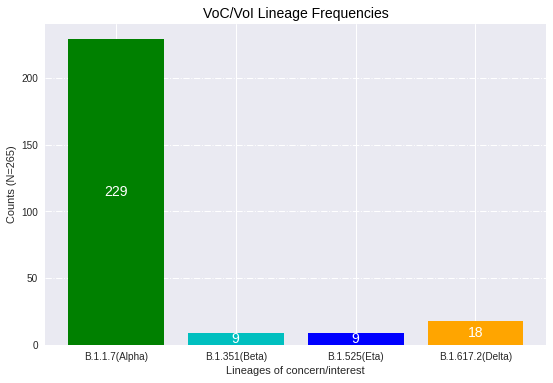

In [367]:
fig,ax = plt.subplots()
y = df_voc_grp_lin
yy = map(replace_with_who_lin, list(y.index))
y.index = yy

n = sum(y)
g = plt.bar(y.index, y, color=['g', 'c', 'b', 'orange'])
ax.bar_label(g, label_type='center', labels=list(y), color='w')
plt.ylabel(f'Counts (N={n})')
plt.xlabel('Lineages of concern/interest')
plt.grid('major', axis='y', ls='-.')
plt.title('VoC/VoI Lineage Frequencies', fontdict)
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-voci_{dt}.png')
plt.show()

In [368]:
def assign_seq_platform(x):
    x = str(x)
    if 'ONT' in x: 
        return x.replace(x, 'ONT')
    elif '_NS' in x:
        return x.replace(x, 'NextSeq')
    return x.replace(x, 'MiSeq')

In [369]:
covv_seq_tech = (df_seq_summ.assign(covv_seq_tech=df_seq_summ['run_num'].
                apply(lambda x: assign_seq_platform(x))))
                #.replace('Failed', np.NaN)

In [370]:
covv_seq_tech.head()

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,covv_seq_tech
0,COVC11310,20C,B.1,59.3,Run1,09-02-2021,MiSeq
1,COVC00854,20C,B.1,94.9,Run7,18-05-2021,MiSeq
2,COVC00867,20C,B.1.446,68.2,Run7,18-05-2021,MiSeq
3,COVC00893,20C,B.1.446,84.1,Run7,18-05-2021,MiSeq
4,COVC00915,NaN,Failed,0.0,Run7,18-05-2021,MiSeq


In [ ]:
covv_seq_tech[covv_seq_tech['genome_coverage'] >= 60].shape

In [ ]:
covv_seq_tech[covv_seq_tech['genome_coverage'] >= 50].shape

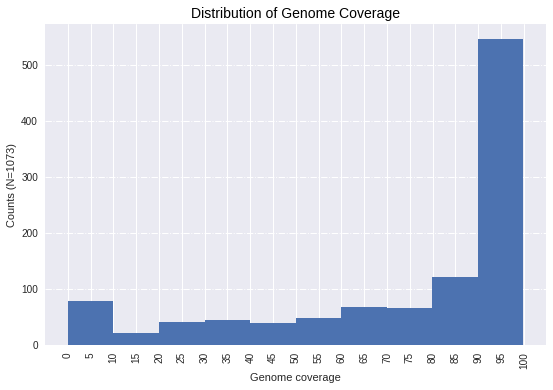

In [371]:
fig,ax = plt.subplots(1,1)
plt.hist(covv_seq_tech['genome_coverage'])
plt.xlabel('Genome coverage')
plt.ylabel(f'Counts (N={covv_seq_tech.shape[0]-1})')
plt.xticks(np.arange(0,105, 5), rotation=90)
# plt.yticks(np.arange(0,375, 25))
plt.grid('major', axis='y', ls='-.')
plt.title('Distribution of Genome Coverage', fontdict)
# ax.hlines(67, 2, 99, colors='orange', linestyles='--')
# plt.annotate('80% coverage threshold', xy=(30, 80))
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-coverage_{dt}.png')
plt.show()



In [372]:
df_seq_summ.shape

(1074, 6)

In [373]:
df_metadata = pd.read_excel('/home/douso/Documents/TrendData/Results/ResultsMerged/COVID19-results-merged-cln.xlsx')

In [374]:
df_metadata.head()

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF
0,COVC00001,35.0,F,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
1,COVC00002,29.0,M,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
2,COVC00003,50.0,M,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
3,COVC00004,35.0,F,Casual,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
4,COVC00005,27.0,F,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02


In [375]:
df_metadata_sub = df_metadata[df_metadata['S_NUM'].isin(list(df_seq_summ['sequence_name']))]

In [376]:
df_metadata_sub.shape

(1033, 15)

In [ ]:
df_metadata_sub.sort_values('DT_CONF').to_excel(f'/home/douso/Documents/TrendData/Results/ResultsMerged/all-sequenced-samples_{dt}.xlsx', index=False)

In [377]:
df_metadata[df_metadata['S_NUM'].str.contains('_')]

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF
24478,KEMRI_01_89431,44.0,M,NaN,Kenya,Kirinyaga,Mwea,No,NaN,NaN,NaN,2021-01-07,2021-07-30,Positive,2021-01-11
24479,KEMRI_01_89447,28.0,F,NaN,Kenya,Kirinyaga,Kirinyaga east,No,NaN,NaN,NaN,2020-12-24,2021-07-30,Positive,2021-01-11
24480,KEMRI_01_89476,41.0,M,NaN,Kenya,Nairobi,Kasarani,No,NaN,NaN,"sore throat,cough,headache,fever",2021-01-08,2021-07-30,Positive,2021-01-11
24481,KEMRI_01_89487,57.0,M,NaN,Kenya,Kiambu,Githunguri,No,NaN,NaN,NaN,2021-01-07,2021-07-30,Positive,2021-01-11
24482,KEMRI_01_89581,53.0,F,NaN,Kenya,Kajiado,Ngong,No,NaN,NaN,NaN,2021-12-01,2021-07-30,Positive,2021-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24557,KEMRI_02_93645,37.0,F,NaN,Kenya,Kiambu,Githunguri,No,NaN,NaN,"Fever, Cough, Sore throat, Runny nose, Chest p...",2021-02-25,2021-07-30,Positive,2021-02-03
24558,KEMRI_02_93781,46.0,M,NaN,Kenya,Nairobi,Roysambu,No,NaN,NaN,"Cough, Difficulty in breathing",2021-02-26,2021-07-30,Positive,2021-02-03
24559,KEMRI_02_93791,34.0,F,NaN,Kenya,Nairobi,Ruaraka,No,NaN,NaN,"Cough, Sore throat, Confusion, Shortness of br...",2021-01-03,2021-07-30,Positive,2021-02-03
24560,KEMRI_02_93792,45.0,M,NaN,Kenya,Nairobi,Dagoretti south,No,NaN,NaN,NaN,2021-01-03,2021-07-30,Positive,2021-02-03


In [378]:
df_sub = df_seq_summ[df_seq_summ['sequence_name'].isin(list(df_metadata['S_NUM'])) == True]

In [379]:
len(list(df_sub['sequence_name']))

1067

In [380]:
usecols=['S_NUM', 'AGE_YRS', 'COUNT_RES', 'DT_CONF']

In [381]:
df_seq_meta = covv_seq_tech.merge(df_metadata[usecols], how='inner', left_on='sequence_name', right_on='S_NUM').drop('S_NUM', axis=1)

In [382]:
df_seq_meta.head()

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,covv_seq_tech,AGE_YRS,COUNT_RES,DT_CONF
0,COVC11310,20C,B.1,59.3,Run1,09-02-2021,MiSeq,30.0,Garissa,2020-10-03
1,COVC11310,20C,B.1,97.0,Run8,25-05-2021,MiSeq,30.0,Garissa,2020-10-03
2,COVC00854,20C,B.1,94.9,Run7,18-05-2021,MiSeq,23.0,Nairobi,2020-06-13
3,COVC00867,20C,B.1.446,68.2,Run7,18-05-2021,MiSeq,32.0,Nairobi,2020-06-13
4,COVC00893,20C,B.1.446,84.1,Run7,18-05-2021,MiSeq,31.0,Nairobi,2020-06-13


In [383]:
df_seq_meta.columns = ['sequence_name', 'clade', 'lineage', 'genome_coverage', 'run_num',
       'seq_dt', 'seq_tech', 'age_yrs', 'county_res', 'dt_conf']

In [384]:
df_seq_meta.head()

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,seq_tech,age_yrs,county_res,dt_conf
0,COVC11310,20C,B.1,59.3,Run1,09-02-2021,MiSeq,30.0,Garissa,2020-10-03
1,COVC11310,20C,B.1,97.0,Run8,25-05-2021,MiSeq,30.0,Garissa,2020-10-03
2,COVC00854,20C,B.1,94.9,Run7,18-05-2021,MiSeq,23.0,Nairobi,2020-06-13
3,COVC00867,20C,B.1.446,68.2,Run7,18-05-2021,MiSeq,32.0,Nairobi,2020-06-13
4,COVC00893,20C,B.1.446,84.1,Run7,18-05-2021,MiSeq,31.0,Nairobi,2020-06-13


In [385]:
df_seq_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 0 to 1066
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sequence_name    1067 non-null   object        
 1   clade            1037 non-null   object        
 2   lineage          1067 non-null   object        
 3   genome_coverage  1067 non-null   float64       
 4   run_num          1067 non-null   object        
 5   seq_dt           1067 non-null   object        
 6   seq_tech         1067 non-null   object        
 7   age_yrs          985 non-null    float64       
 8   county_res       1039 non-null   object        
 9   dt_conf          1067 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 91.7+ KB


In [386]:
df_gby_lin = df_seq_meta.groupby('lineage').count()#, as_index=False

In [470]:
clr_code = {'A':('midnightblue','#191970'),
'A.23':('lime','#00FF00'),
'A.23.1':('gray','#808080'),
'A.25':('orangered','#FF4500'),
'AY.4':('mediumvioletred','#C71585'),
'AY.12':('saddlebrown','#8B4513'),
'B.1':('cyan','#00FFFF'),
'B.1.1':('chocolate','#D2691E'),
'B.1.1.1':('wheat','#F5DEB3'),
'B.1.1.171':('teal','#008080'),
'B.1.1.406':('slategray','#708090'),
'B.1.1.7':('orange','#FFA500'),
'B.1.103':('seagreen','#2E8B57'),
'B.1.143':('olive','#808000'),
'B.1.153':('taffy','#F96DDA'),
'B.1.160':('honeydew','#FFD700'),
'B.1.214':('gold','#8FBC8F'),
'B.1.276':('aquamarine','#006400'),
'B.1.302':('yellowgreen','#9ACD32'),
'B.1.1.318':('slategray','#708090'),
'B.1.336':('tan','#D2B48C'),
'B.1.343':('indigo','#4B0082'),
'B.1.349':('mediumpurple','#9370DB'),
'B.1.351':('blue','#0000FF'),
'B.1.378':('darkslateblue','#483D8B'),
'B.1.388':('sienna','#A0522D'),
'B.1.390':('darkkhaki','#BDB76B'),
'B.1.393':('sapphire','#0F52BA'),
'B.1.405':('royal','#7852A9'),
'B.1.429':('khaki','#F0E68C'),
'B.1.433':('dodgerblue','#1E90FF'),
'B.1.446':('palevioletred','#DB7093'),
'B.1.517':('yellow','#FFFF00'),
'B.1.520':('cornflowerblue','#6495ED'),
'B.1.524':('pink','#FFC0CB'),
'B.1.525':('green','#008000'),
'B.1.527':('maya','#73C2FB'),
'B.1.530':('red','#AFEEEE'),
'B.1.535':('purple','#800080'),
'B.1.540':('slategray','#AF69EE'),
'B.1.549':('brown','#A52A2A'),
'B.1.551':('chocolate','#D2691E'),
'B.1.577':('silver','#C0C0C0'),
'B.1.596':('steelblue','#4682B4'),
'B.1.596.1':('magenta','#FF00FF'),
'B.1.605':('rosybrown','#BC8F8F'),
'B.1.612':('goldenrod','#DAA520'),
'B.1.617.2':('paleturquoise','#FF0000'),
'TBA10':('lavender','#E6E6FA'),
'TBA14':('seashell','#FFFAF0'),
'TBA18':('black','#000000'),
'TBA2':('cornflowerblue','#FFF5EE'),
'TBA6':('darkgreen','#7FFFD4'),
'TBA8':('darkseagreen','#F0FFF0'),
'c': ('cyan', 'c'),
'm': ('magenta', 'm'),
'k': ('black', 'k')}
avail_clr = ['TBA2', 'TBA6', 'TBA8', 'TBA10', 'TBA14', 'c', 'm', 'k']

In [388]:
clr_code_keys = list(clr_code.keys())

In [389]:
lins = df_gby_lin.sequence_name.sort_values(ascending=False)#.index
# lins

In [390]:
lin_to_be_assinged =  set(lins.index) - set(clr_code_keys)
# lin_to_be_assinged

In [391]:
import pprint
for lin, clr in zip(lin_to_be_assinged, avail_clr):
#     print(lin, clr)
    clr_code[lin] = clr_code.pop(clr)
    avail_clr.remove(clr)

In [392]:
# pprint.pprint(clr_code)
pprint.pprint(avail_clr)

['TBA4', 'TBA8', 'TBA12', 'TBA16', 'TBA20', 'TBA22', 'c', 'k']


In [393]:
def replace_with_who_lin(x):
    if x == 'B.1.1.7':
        return x.replace(x, 'B.1.1.7(Alpha)')
    if x == 'B.1.617.2':
        return x.replace(x, 'B.1.617.2(Delta)')
    if x == 'B.1.351':
        return x.replace(x, 'B.1.351(Beta)')
    if x == 'B.1.525':
        return x.replace(x, 'B.1.525(Eta)')
    return x
    

In [394]:
ylabels = list(map(replace_with_who_lin,list(lins.index)))

In [395]:
lins.index=ylabels

In [396]:
lins.values.sum()

1067

In [397]:
max_count = lins.max()
max_count

298

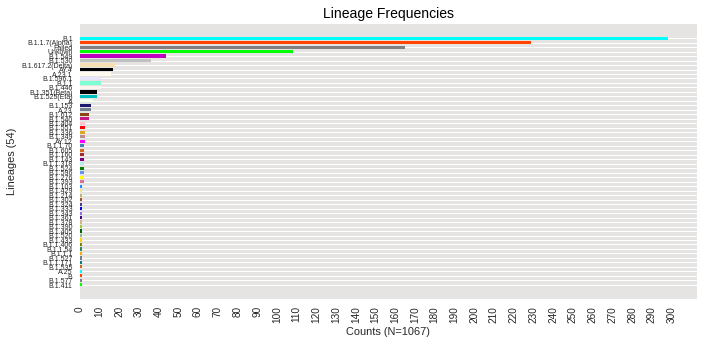

In [398]:
import math
width = lins.sort_values(ascending=True)

# colors = [clr_code[lin.split('(')[0]][1] for lin in width.index]
colors = [clr_code[lin][1] for lin in clr_code.keys()]
n = len(lins) - 2
m = sum(lins)
xticks = np.arange(0, (math.ceil(max_count / 5) + 1) * 5, 10)
fig, ax =plt.subplots(1, 1, figsize=(10,5))
ax.set_facecolor("#E5E4E2")##E5E4E2

plt.barh(width.index, width, height=0.7, log=False, color=colors)#, logy=True
plt.xticks(xticks, xticks, rotation=90)
plt.yticks(width.index, fontsize=7)
plt.grid(which='major', axis='x', ls='--', color='w')
plt.ylabel(f'Lineages ({n})')
plt.xlabel(f'Counts (N={m})')
plt.title('Lineage Frequencies', fontdict)
plt.tight_layout()
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-lineages_{dt}600.png', dpi=600.0)
plt.show()

In [50]:
df_metadata.shape[0]-153

24462

In [402]:
df_1 = df_metadata[df_metadata['S_NUM'].str.contains('COV') == False]#.shape#.\
# to_excel('/home/douso/Downloads/fjjsfbfdbfb.xlsx')

In [52]:
df_2 = df_metadata[df_metadata['S_NUM'].str.contains('COVC') == False]#.shape#.\
# to_excel('/home/douso/Downloads/fjjsfbfdbfb.xlsx')

In [53]:
set(df_2['S_NUM']) - set(df_1['S_NUM'])

{'COVE20',
 'COVE21',
 'MOH-COV-1',
 'MOH-COV-2',
 'MOH-COV-3',
 'MOH-COV-4',
 'MOH-COV-5',
 'MOH-COV-6'}

In [403]:
df_covs = df_metadata[df_metadata['S_NUM'].str.contains('COVC') == True]#.shape

In [404]:
df_covs.head()#shape

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF
0,COVC00001,35.0,F,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
1,COVC00002,29.0,M,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
2,COVC00003,50.0,M,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
3,COVC00004,35.0,F,Casual,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
4,COVC00005,27.0,F,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02


In [406]:
df_covs['RESULT'].value_counts(dropna=False)

Negative    20786
Positive     3503
ms              7
Name: RESULT, dtype: int64

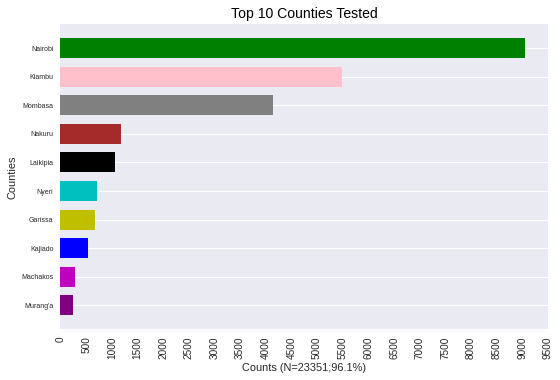

In [407]:
import math
width = df_covs['COUNT_RES'].value_counts()[:10].sort_values(ascending=True)

max_count = max(width)
# colors = [clr_code[lin.split('(')[0]][1] for lin in width.index]
# n = len(lins) - 2
m = sum(width)
n = df_covs.shape[0]
xticks = np.arange(0, (math.ceil(max_count / 500) + 1) * 500, 500)
fig, ax =plt.subplots()
# ax.set_facecolor("#E5E4E2")##E5E4E2

plt.barh(width.index, width, height=0.7, color=['purple', 'm', 'b',
                                                'y', 'c', 'k',
                                                'brown', 'gray',
                                               'pink', 'g'])#, logy=True
plt.xticks(xticks, xticks, rotation=90)
plt.yticks(width.index, fontsize=7)
plt.grid(which='major', axis='x', ls='--', color='lightgray')
plt.ylabel('Counties')
plt.xlabel(f'Counts (N={m};{round(m/n*100, 1)}%)')
plt.title('Top 10 Counties Tested', fontdict)
plt.tight_layout()
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-top10Counties_{dt}.png')
plt.show()

In [62]:
df_covs['RESULT'].value_counts(dropna=True)#[2]

Negative    20788
Positive     3509
ms              7
Name: RESULT, dtype: int64

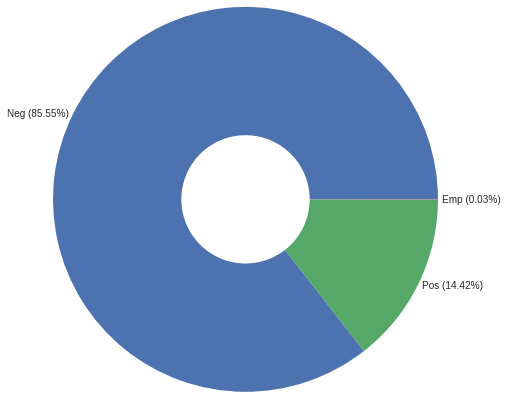

In [408]:
fig,ax = plt.subplots()

data = df_covs['RESULT'].value_counts()[:3]
pct = (np.array(data)/np.array(data).sum()*100).round(2)
plt.pie(data, wedgeprops=dict(width=1), labels=[f'Neg ({pct[0]}%)', 
                      f'Pos ({pct[1]}%)', 
                      f'Emp ({pct[2]}%)'], labeldistance=1.02, radius=1.5)
# ax.set_title('Proportions for Test Outcome', fontdict, pad=1.1)
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-results_{dt}.png')
plt.show()

In [674]:
df_seq_meta.head()

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,seq_tech,age_yrs,county_res,dt_conf
0,COVC11310,20C,B.1,59.3,Run1,09-02-2021,MiSeq,30.0,Garissa,2020-10-03
1,COVC11310,20C,B.1,97.0,Run8,25-05-2021,MiSeq,30.0,Garissa,2020-10-03
2,COVC00854,20C,B.1,94.9,Run7,18-05-2021,MiSeq,23.0,Nairobi,2020-06-13
3,COVC00867,20C,B.1.446,68.2,Run7,18-05-2021,MiSeq,32.0,Nairobi,2020-06-13
4,COVC00893,20C,B.1.446,84.1,Run7,18-05-2021,MiSeq,31.0,Nairobi,2020-06-13


In [776]:
tops = df_seq_meta[df_seq_meta['lineage'].isin(['Failed', 'Unkown']) == False]['lineage'].value_counts().index[:10].tolist()#.head()
tops

['B.1',
 'B.1.1.7',
 'B.1.549',
 'B.1.530',
 'B.1.617.2',
 'AY.4',
 'A.23.1',
 'B.1.596.1',
 'B.1.1',
 'B.1.446']

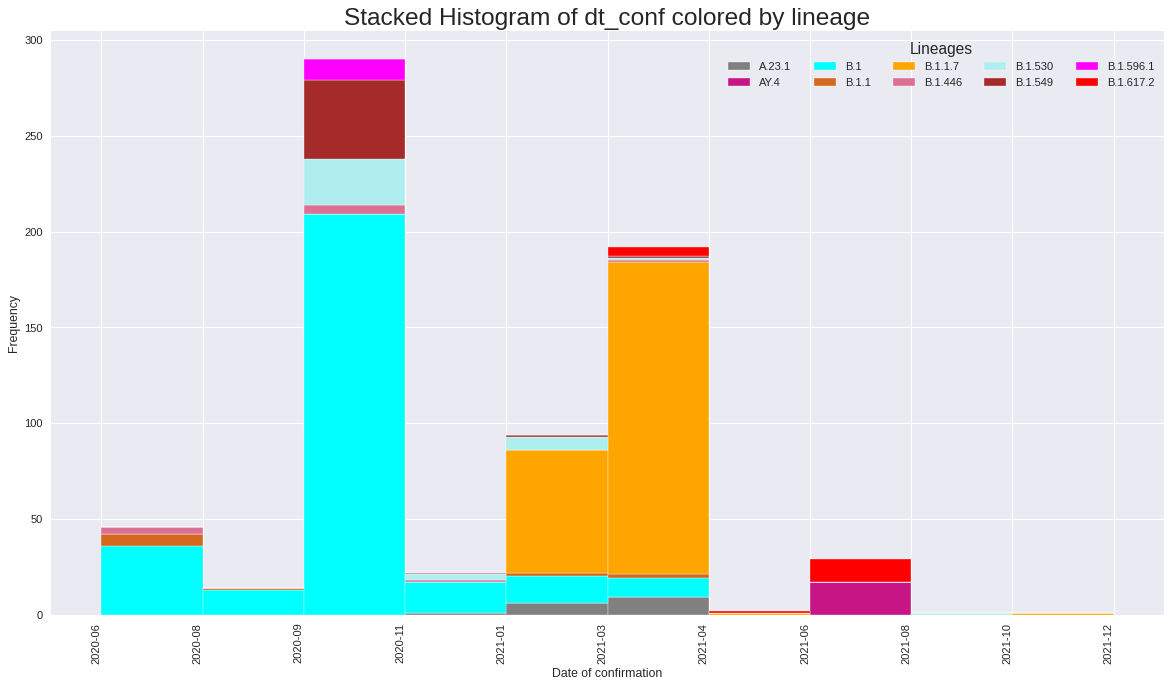

In [800]:
# Prepare data
df = df_seq_meta[df_seq_meta['lineage'].isin(['Failed', 'Unkown']) == False]

x_var = 'dt_conf'
groupby_var = 'lineage'
df_agg = df[df['lineage'].isin(tops)].loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

colors = {i: lin_colors[i] for i, df in df_agg}
# Draw
plt.figure(figsize=(16,9), dpi= 80)
# colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, len(df_agg[x_var].unique()), stacked=True, density=False, color=colors.values(), ec='w')

# Decoration
plt.legend(colors, title='Lineages', ncol=5)
plt.title(f"Stacked Histogram of {x_var} colored by {groupby_var}", fontsize=22)
plt.xlabel('Date of confirmation')
plt.ylabel("Frequency")
# plt.ylim(0, 40)
plt.xticks(ticks=bins, labels=pd.to_datetime(bins).strftime('%Y-%m'), rotation=90, horizontalalignment='right')
plt.show()

In [802]:
pd.Timestamp(44381)

Timestamp('1970-01-01 00:00:00.000044381')

In [697]:
pd.to_datetime(bins).strftime('%Y %m')

Index(['2020 06', '2020 07', '2020 08', '2020 09', '2020 10', '2020 11',
       '2020 11', '2020 12', '2021 01', '2021 02', '2021 03', '2021 04',
       '2021 05', '2021 06', '2021 07', '2021 08', '2021 09', '2021 10',
       '2021 11', '2021 12'],
      dtype='object')

In [409]:
df_timeidx = df_seq_meta.set_index('dt_conf').sort_index()

In [410]:
df_timeidx.head()

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,seq_tech,age_yrs,county_res
dt_conf,,,,,,,,,
2020-06-13,COVC00854,20C,B.1,94.9,Run7,18-05-2021,MiSeq,23.0,Nairobi
2020-06-13,COVC00867,20C,B.1.446,68.2,Run7,18-05-2021,MiSeq,32.0,Nairobi
2020-06-13,COVC00893,20C,B.1.446,84.1,Run7,18-05-2021,MiSeq,31.0,Nairobi
2020-06-13,COVC00915,NaN,Failed,0.0,Run7,18-05-2021,MiSeq,22.0,Nairobi
2020-06-14,COVC00962,20A,B.1,92.9,Run7,18-05-2021,MiSeq,31.0,Nairobi


In [624]:
df_ts = df_timeidx[df_timeidx['lineage'].isin(['Unkown', 'Failed']) == False]

In [625]:
top10lins = df_ts['lineage'].value_counts()[:10].index

In [626]:
df_ts2 = df_ts[df_ts['lineage'].isin(top10lins)]

In [627]:
monthly = df_ts2.resample('W', closed='right')#['lineage'].value_counts()

In [628]:
x = monthly['lineage'].value_counts()#.to_frame()#.T#.plot.hist(stacked=True)

In [629]:
x_index = list(x.index)
x_counts = list(x)

In [630]:
dict_={}
for idx,lin in zip(x_index, x_counts):
    if idx[0] in dict_:
        dict_[idx[0]][idx[1]] = lin
    else:
        dict_[idx[0]] = {}
        dict_[idx[0]][idx[1]] = lin

In [645]:
dt_lin_ts = pd.DataFrame(columns=set(x.index.get_level_values(1)))
data = {l: 0 for l in set(x.index.get_level_values(1))}
idx = []
for k,v in dict_.items():
    data.update(v)
    dt_lin_ts = dt_lin_ts.append(data, ignore_index=True)
    idx.append(k)#.strftime('%Y-%m-%d'))
dt_lin_ts.index=idx
# dt_lin_ts

In [644]:
dt_lin_ts.max().sort_values()#plot()

B.1.596.1     4
B.1.446       4
B.1.1         4
B.1.617.2     4
A.23.1        4
AY.4         13
B.1.530      16
B.1.549      22
B.1.1.7      51
B.1          65
dtype: object

In [649]:
# plt.style.available
lin_colors = {k: clr_code[k][1] for k,v in clr_code.items()}

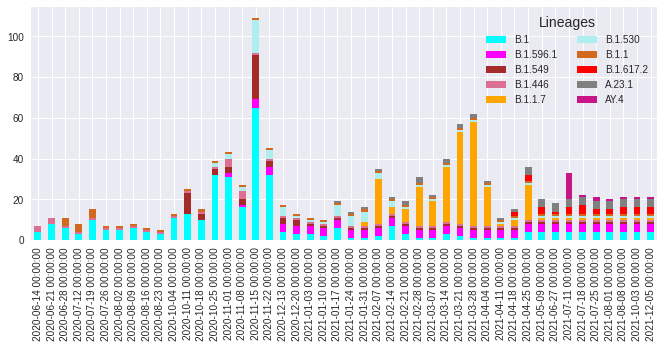

In [684]:
# plt.style.use('fivethirtyeight')
plt.style.use('seaborn')
# plt.style.use('ggplot')

fig,ax = plt.subplots(figsize=(10,4))
dt_lin_ts.plot.bar(stacked=True, ax=ax, color=lin_colors)
plt.legend(title='Lineages', bbox_to_anchor = (1, 1), fancybox=True, ncol=2)

In [641]:
import numpy as np
from scipy.interpolate import interp1d, make_interp_spline
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive


topX = list(top10lins) + ['All']
lineage = widgets.Dropdown(options=topX, value='All', description='Lineages:')
interp_points = widgets.IntSlider(value=500, min=100, max=2100, step=500, description='Number of data points:')
 
def graph1(lineage, interp_points):
    # Dataset
    df = dt_lin_ts
    n = df.shape[0]
    
    #Get x boundaries
    start = pd.Timestamp(df.index[0])
    end = pd.Timestamp(df.index[-1])
    
    #X-locators
    dt_rng = pd.date_range(start, end, periods=n, normalize=True)
    xticks = [pd.Timestamp(dt).value for dt in dt_rng]#dt_lin_ts.index
    xlabel = [dt.strftime('%Y-%m') for dt in dt_rng]#dt_lin_ts.index
    
    #Plot canvas
    fig,ax = plt.subplots()
    
    if lineage == 'All':
        lins = df.columns
    else:
        lins = []; lins.append(lineage)
    for lin in lins:
#         df += 1
        y=df[lin]
        x_interp = np.linspace(start.value, end.value, len(y))
    
        #Train model
#         cubic_interploation_model = interp1d(x_interp, y, kind = "cubic")
        bspline_interp = make_interp_spline(x_interp, y, k=3)
 
        # Plotting the Graph
        X_=np.linspace(x_interp.min(), x_interp.max(), interp_points)
#         Y_=cubic_interploation_model(X_)
        Y_=bspline_interp(X_)

        ax.plot(X_, Y_, label=lin, color=lin_colors[lin])
        ax.legend()
    plt.title('Lineages count over time')
# ax.xaxis.set_major_locator(MultipleLocator(20))
# ax.xaxis.set_minor_locator(MultipleLocator(4))
    plt.xticks(xticks, labels=xlabel, rotation=90)
    plt.xlabel("Months")
    plt.ylabel("Lineage Counts")
    plt.show()

In [642]:
interactive(graph1, lineage=lineage, interp_points=interp_points)

interactive(children=(Dropdown(description='Lineages:', index=10, options=('B.1', 'B.1.1.7', 'B.1.549', 'B.1.5…

In [568]:
from ipywidgets import widgets, interactive

In [127]:
index = df_ts['lineage'].resample('M', closed='right').count().index

In [128]:
ticks = [dt.value for dt in index]

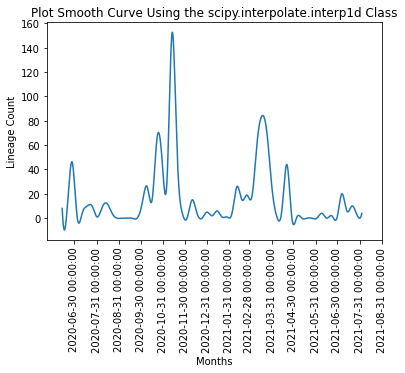

In [195]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
 
# Dataset
n=df_ts.shape[0]
x=np.arange(n)
y=np.array(df_ts['lineage'].resample('W', closed='right').count())

start = pd.Timestamp(df_ts.index[0])
end = pd.Timestamp(df_ts.index[-1])

t = np.linspace(start.value, end.value, len(y))

cubic_interploation_model = interp1d(t, y, kind = "cubic")
 
# Plotting the Graph
X_=np.linspace(t.min(), t.max(), 5000)
Y_=cubic_interploation_model(X_)

fig,ax = plt.subplots()

plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.interp1d Class")
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(4))
plt.xticks(ticks, labels=index, rotation=90)
plt.xlabel("Months")
plt.ylabel("Lineage Count")
plt.show()

In [68]:
start = pd.Timestamp(df_ts.index[0])
end = pd.Timestamp(df_ts.index[-1])

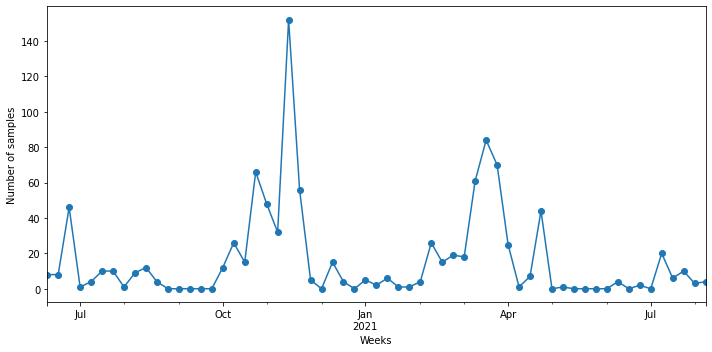

In [65]:
import numpy as np
from scipy.interpolate import interp1d

fig, ax = plt.subplots(figsize=(10, 5))

tests = df_ts['lineage'].resample('W').count()
# pos = df_tseries0['RESULT'].resample('W').count()
# neg = df_tseries1['RESULT'].resample('W').count()

tests.plot(ax=ax, marker='o', linestyle='-', label='tests')
# neg.plot(ax=ax, marker='o', linestyle='-', label='negaives')
# pos.plot(ax=ax, marker='o', linestyle='-', label='positives')

plt.xlabel('Weeks')
plt.ylabel('Number of samples')
# plt.legend()
plt.tight_layout()
# fig.savefig(f'/home/douso/Documents/TrendData/plots/draft_cov_trends_plot-line_{dt}.png')
plt.show()